<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Thực hiện phân tích phân biệt tuyến tính (LDA) trong Python**

*Lưu ý:* Dự án này dựa trên [hướng dẫn này](https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/) do Eda Kavlakoglu viết.

Thời gian ước tính: **45** phút

**Phân tích phân biệt tuyến tính** (LDA) là một kỹ thuật hữu ích được sử dụng trong việc giải quyết các bài toán phân loại. Các bài toán **phân loại** liên quan đến việc phân chia các đối tượng vào các danh mục khác nhau, chẳng hạn như phân loại hình ảnh thành mèo hoặc chó, hoặc phân loại email thành spam hoặc không spam. LDA có thể được áp dụng trực tiếp như một bộ phân loại cho các nhiệm vụ này. Tuy nhiên, thường xuyên hơn, LDA được sử dụng để giảm chiều dữ liệu, trong đó nó chuyển đổi các đặc trưng để được sử dụng bởi các mô hình phân loại khác cho mục đích phân loại.

Trong dự án thực hành hướng dẫn này, bạn sẽ hiểu được bản chất của LDA. Hơn nữa, bạn sẽ áp dụng LDA vừa như một bộ phân loại vừa như một kỹ thuật giảm chiều dữ liệu, từ đó có cái nhìn sâu sắc về ưu điểm và nhược điểm của nó. Hãy học cách áp dụng LDA trong Python và cải thiện khả năng phân loại dữ liệu của bạn với kỹ thuật học máy dễ hiểu và dễ áp dụng này.

<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0IAEEN/midjourney_Men_and_women_pass_each_other_on_the_sidewalk.jpeg" width="80%" alt="LDA illustration">
</center>
<p style="text-align: center;">Ví dụ minh họa về LDA. Hình ảnh được tạo ra bởi AI</p>

<hr style="border:2px solid gray">


---


# Mục tiêu

Sau khi hoàn thành bài tập này, bạn sẽ có thể:

 - Giải thích bản chất của LDA
 - Vẽ ranh giới quyết định của LDA cho một nhiệm vụ phân loại nhị phân
 - Sử dụng LDA cho phân loại
 - Sử dụng LDA để giảm chiều dữ liệu
 - Thực hiện LDA bằng Python


<hr style="border:2px solid gray">


# Setup


Để thực hiện bài tập này, chúng ta sẽ sử dụng các thư viện sau:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) để quản lý dữ liệu.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) để thực hiện các phép toán toán học.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) cho các chức năng học máy và các hàm liên quan đến pipeline học máy.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) để trực quan hóa dữ liệu.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) cho các công cụ vẽ đồ thị bổ sung.

## Cài đặt các thư viện yêu cầu

Các thư viện yêu cầu dưới đây __không__ được cài sẵn trong môi trường Skills Network Labs. __Bạn sẽ cần chạy ô lệnh sau__ để cài đặt chúng:

In [1]:
#!pip install seaborn

## Nhập các thư viện yêu cầu

Chạy ô lệnh dưới đây để nhập các thư viện yêu cầu.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
#%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import shuffle

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

<hr style="border:2px solid gray">


# Nhập bộ dữ liệu hoa iris

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/99/%E5%B1%B1%E9%B3%B6%E5%B0%BE_Iris_setosa_-%E6%AF%94%E5%88%A9%E6%99%82_Ghent_University_Botanical_Garden%2C_Belgium-_%289200911388%29.jpg" width="80%" alt="iris image">

<p style="text-align: center;">Iris setosa. <i><font color=gray>Nguồn hình ảnh: </font></i><a href="https://commons.wikimedia.org/wiki/File:%E5%B1%B1%E9%B3%B6%E5%B0%BE_Iris_setosa_-%E6%AF%94%E5%88%A9%E6%99%82_Ghent_University_Botanical_Garden,_Belgium-_(9200911388).jpg">Wikimedia</a>. <i><font color=gray>Tác giả: </font></i><a href="https://www.flickr.com/people/52582306@N03">阿橋 HQ</a></a>. <i><font color=gray>Giấy phép: </font></i> <a href="Attribution-Share Alike 2.0 Generic">cc-by-sa-2.0</a></p>.
</center>

Trong bài tập này, bạn sẽ làm việc với bộ dữ liệu hoa [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) nổi tiếng. Bộ dữ liệu này thường được sử dụng để minh họa các bài toán phân loại. Nhiệm vụ cụ thể của bạn là phân loại các loài hoa iris thành ba loại: `setosa`, `versicolor`, và `virginica`.

Đối với mỗi hoa, bạn sẽ quan sát các đặc tính sau:
 - `sepal_length` (chiều dài đài hoa)
 - `sepal_width` (chiều rộng đài hoa)
 - `petal_length` (chiều dài cánh hoa)
 - `petal_width` (chiều rộng cánh hoa)

Hãy bắt đầu bằng cách tải bộ dữ liệu hoa iris từ thư viện `sklearn` vào một đối tượng `pandas.DataFrame`:

In [3]:
# Load the data set from sklearn
dataset_sklearn = load_iris()

# Extract the data and target labels as a numpy array
dataset_npy = np.concatenate([dataset_sklearn['data'], np.atleast_2d(dataset_sklearn['target']).T], axis=1)

# Define column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Convert the numpy array to a pandas dataframe with column names
dataset = pd.DataFrame(dataset_npy, columns=col_names)

# Define the class names
class_names = dict(
    zip(
        range(len(dataset_sklearn['target_names'])), dataset_sklearn['target_names']
    )
)

# Replace class labels with class names
dataset['class'] = dataset.loc[:, 'class'].replace(class_names)

# Print a description of the iris flower data set
print(dataset_sklearn['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Hãy xem 5 dòng mẫu từ bộ dữ liệu mà chúng ta đã tải:

In [4]:
dataset.sample(5, random_state=2024)

sepal_length  sepal_width  petal_length  petal_width       class
14            5.8          4.0           1.2          0.2      setosa
37            4.9          3.6           1.4          0.1      setosa
78            6.0          2.9           4.5          1.5  versicolor
138           6.0          3.0           4.8          1.8   virginica
46            5.1          3.8           1.6          0.2      setosa

<hr style="border:2px solid gray">


# Tiền xử lý dữ liệu

Trong bước này, chúng ta sẽ tách các biến đặc trưng (`X`) khỏi biến mục tiêu (`y`), và áp dụng tiền xử lý lên biến kết quả để mã hóa nhãn lớp với các giá trị số.

In [5]:
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


Bộ dữ liệu hiện đã được chia thành hai phần: các biến độc lập (đặc trưng, được biểu diễn dưới dạng `X`) và biến phụ thuộc (lớp mục tiêu, được biểu diễn dưới dạng `y`). Lưu ý rằng, đối với lớp mục tiêu, mã hóa nhãn đã được sử dụng để chuyển các nhãn lớp thành giá trị số. Nói cách khác, `y` không còn chứa các tên lớp (`setosa`, `versicolor`, và `virginica`) mà là dữ liệu số dưới dạng các số nguyên. Dưới đây sẽ là một mẫu ngẫu nhiên của các giá trị có trong `y`:

In [6]:
np.random.seed(2024) # Set random seed for reproducability
np.random.choice(y, 5) # Randomly draw 5 samples from y

array([2, 1, 2, 0, 0])

Nếu chúng ta cần quay lại, đối tượng mã hóa nhãn `le` chứa ánh xạ từ các số nguyên này đến các nhãn lớp gốc. Ví dụ, đoạn mã dưới đây sẽ hiển thị ánh xạ đó:


In [7]:
dict(zip(range(len(le.classes_)), le.classes_))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Và đoạn mã dưới đây có thể được sử dụng để chuyển đổi lại các nhãn số nguyên thành các nhãn lớp gốc:


In [8]:
np.random.seed(2024) # Set random seed for reproducability
le.inverse_transform(np.random.choice(y, 5)) # Inverse transform a random draw of 5 samples from y

array(['virginica', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

<hr style="border:2px solid gray">


# Thực hiện phân tích dữ liệu khám phá

Trước khi bạn thực hiện LDA, điều quan trọng là phải phân tích bộ dữ liệu và hiểu rõ các đặc tính của nó. Trong bước này, chúng ta sẽ thực hiện phân tích khám phá bộ dữ liệu Iris bằng cách sử dụng biểu đồ cặp, biểu đồ tần suất và bản đồ nhiệt tương quan.

## Biểu đồ cặp

Biểu đồ cặp minh họa hiệu quả cách các đặc trưng bốn chiều thay đổi và tương quan qua ba lớp hoa iris. Ngoài ra, nó còn cung cấp cái nhìn sâu sắc về khả năng phân tách và sự chồng lấp của các lớp này trong không gian đặc trưng, giúp hiểu rõ hơn về các đặc tính và sự khác biệt giữa các lớp. Các yếu tố trên đường chéo của biểu đồ thể hiện sự phân phối của từng đặc trưng, trong khi các yếu tố ngoài đường chéo hiển thị biểu đồ phân tán cho mỗi cặp đặc trưng.

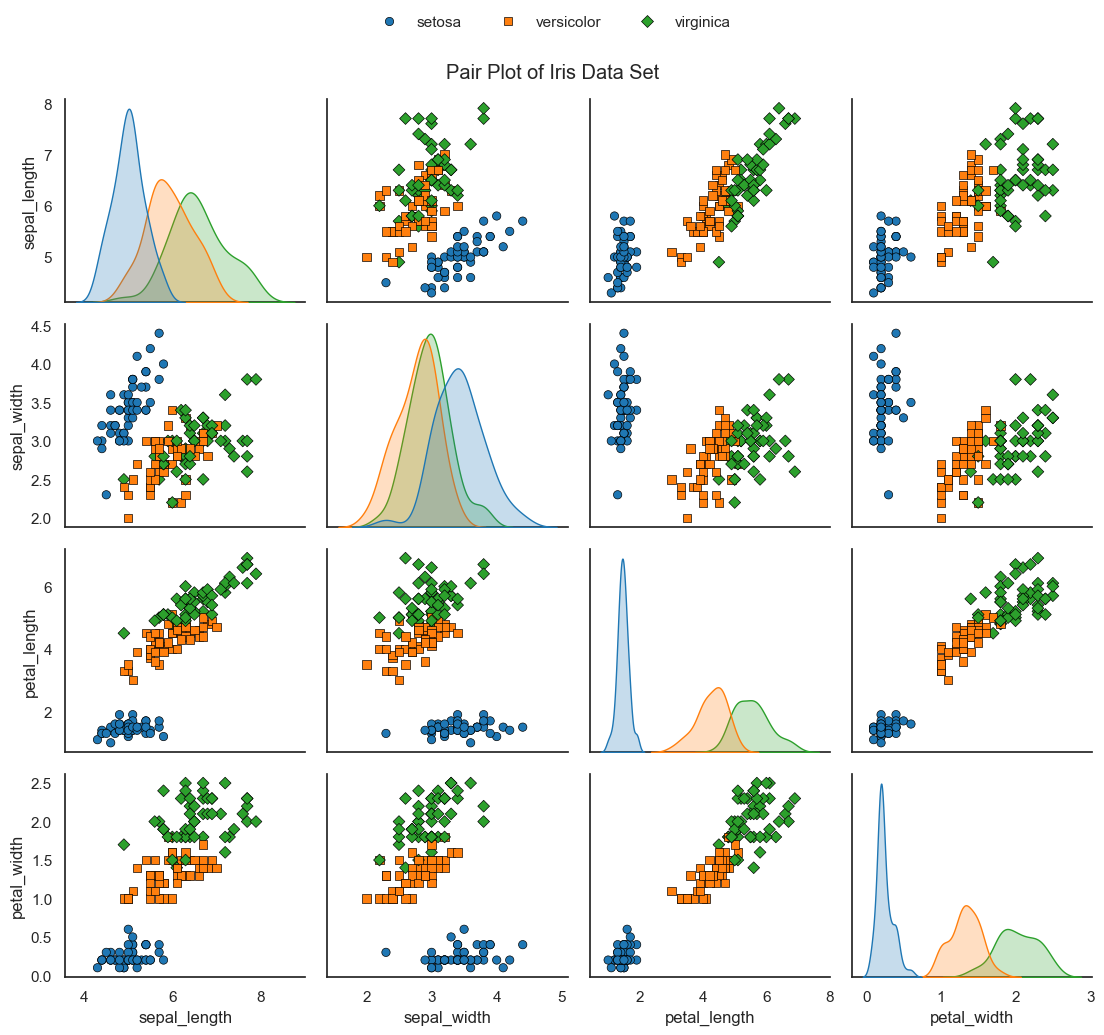

In [9]:
# Create a pair plot to visualize relationships between different features and species.
dataset_rndord = dataset.copy().reset_index(drop=True)
dataset_rndord = shuffle(dataset_rndord, random_state=2024).reset_index(drop=True)
ax = sns.pairplot(dataset_rndord, hue='class', markers=["o", "s", "D"], plot_kws={"edgecolor":"black"})
plt.suptitle("Pair Plot of Iris Data Set")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

Ví dụ, hãy nhìn vào cột đầu tiên của biểu đồ, cột này hiển thị mối quan hệ giữa chiều dài đài hoa và các đặc trưng khác. Chúng ta có thể rút ra những nhận định sau từ biểu đồ cặp:

- Chiều dài đài hoa có phân phối chuẩn hơi lệch phải.
- Iris virginica có chiều dài đài hoa dài nhất, tiếp theo là Iris versicolor và Iris setosa. Iris setosa có sự biến thiên chiều dài đài hoa ít nhất, trong khi Iris virginica có sự biến thiên nhiều nhất.
- Chiều dài đài hoa có sự tương quan tiêu cực với chiều rộng đài hoa. Iris setosa có chiều rộng đài hoa rộng nhất, tiếp theo là Iris versicolor và Iris virginica. Ngoài ra, Iris setosa được phân tách rõ ràng khỏi hai lớp còn lại, trong khi Iris versicolor và Iris virginica có sự chồng lấp trong cặp đặc trưng này.
- Chiều dài đài hoa có sự tương quan dương với chiều dài cánh hoa. Iris virginica có chiều dài cánh hoa dài nhất, tiếp theo là Iris versicolor và Iris setosa. Một lần nữa, Iris setosa được phân tách rõ ràng, trong khi versicolor và virginica có sự chồng lấp.
- Chiều dài đài hoa có sự tương quan dương với chiều rộng cánh hoa. Iris virginica có chiều rộng cánh hoa rộng nhất, tiếp theo là Iris versicolor và Iris setosa. Một lần nữa, Iris setosa được phân tách rõ ràng, trong khi versicolor và virginica có sự chồng lấp.

Bạn có thể áp dụng các phân tích tương tự cho các cột còn lại, duy trì mô hình mối quan hệ giữa các đặc trưng và sự phân biệt lớp.

## Histogram (Biểu đồ tần suất)

Biểu đồ tần suất là công cụ hữu ích để trực quan hóa sự phân phối của từng đặc trưng trong bộ dữ liệu Iris. Biểu đồ này bao gồm bốn biểu đồ tần suất minh họa sự phân phối của chiều dài và chiều rộng của cánh hoa và đài hoa cho ba lớp hoa iris.

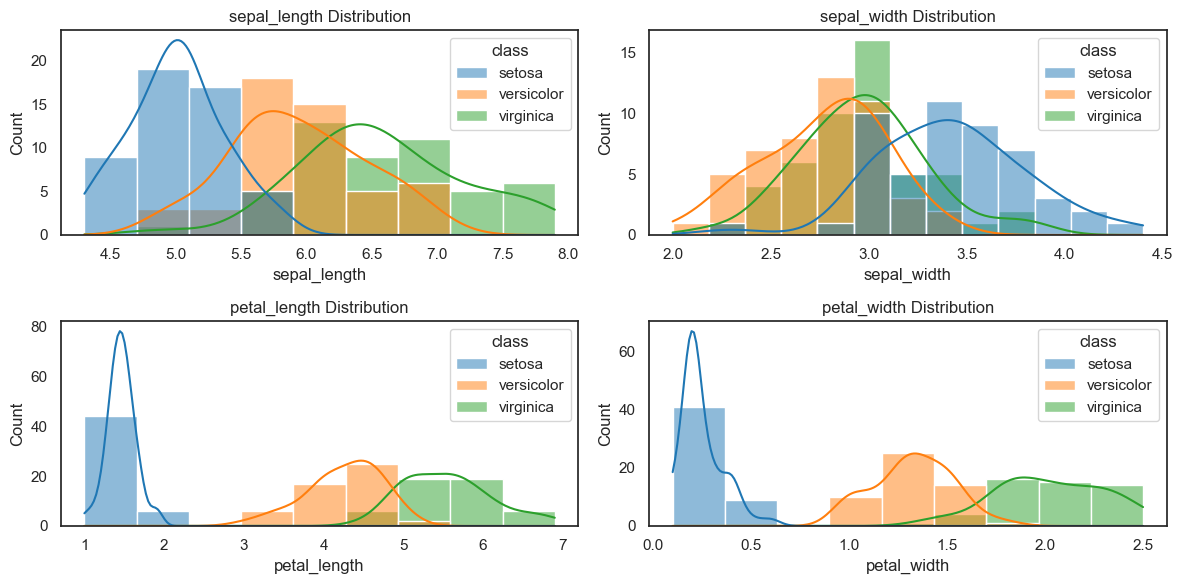

In [10]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(col_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=dataset, x=feature, hue='class', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

Những biểu đồ tần suất này chỉ ra rằng bộ dữ liệu khá cân bằng, nhưng chúng cũng thể hiện sự khác biệt giữa ba lớp hoa iris về chiều dài và chiều rộng của cánh hoa và đài hoa, cho phép rút ra các kết luận sau:

- Iris setosa có đặc trưng với cánh hoa và đài hoa ngắn và hẹp hơn so với Iris versicolor và Iris virginica. Biểu đồ tần suất của nó hiển thị giá trị thấp nhất cho chiều dài và chiều rộng của cánh hoa và đài hoa. Các phân phối của nó có đỉnh hẹp, phản ánh sự biến thiên tối thiểu và sự nhất quán cao trong các phép đo cánh hoa và đài hoa.
- Ngược lại, Iris versicolor và Iris virginica có cánh hoa và đài hoa dài và rộng hơn. Biểu đồ tần suất của chúng hiển thị giá trị cao hơn cho chiều dài và chiều rộng của cánh hoa và đài hoa. Các phân phối của chúng phẳng và rộng hơn, cho thấy sự biến thiên lớn hơn và ít nhất quán trong các phép đo cánh hoa và đài hoa.
- Mặc dù Iris versicolor và Iris virginica có chiều dài và chiều rộng đài hoa tương tự nhau, các phép đo cánh hoa của chúng lại phân biệt rõ rệt. Biểu đồ tần suất cho thấy các phân phối có sự chồng lấp cho các kích thước đài hoa nhưng phân phối riêng biệt cho các kích thước cánh hoa. Điều này nhấn mạnh rằng các phép đo đài hoa một mình không thể phân biệt giữa Iris versicolor và Iris virginica. Các phép đo cánh hoa mang lại sự phân biệt hiệu quả hơn.

## Correlation heatmaps (Bản đồ nhiệt tương quan)

Bản đồ nhiệt tương quan cung cấp cái nhìn sâu sắc về mối quan hệ giữa các đặc trưng khác nhau trong bộ dữ liệu Iris. Nó đóng một vai trò quan trọng trong việc chọn lựa đặc trưng vì nó giúp xác định các tương quan dương và âm giữa hai biến. Các biến bao gồm chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa và chiều rộng cánh hoa, tất cả đều được đo bằng đơn vị cm (centimet).


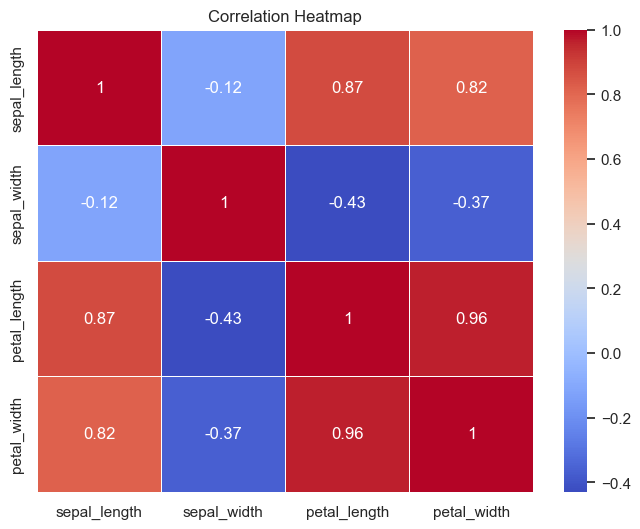

In [11]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Các giá trị trong bản đồ nhiệt dao động từ -0.43 đến 1, với các giá trị gần 1 chỉ ra sự tương quan dương mạnh, và ngược lại. Chúng ta có thể rút ra các kết luận sau từ bản đồ nhiệt:

- Chiều dài đài hoa có sự tương quan dương mạnh với chiều dài và chiều rộng cánh hoa và sự tương quan tiêu cực yếu với chiều rộng đài hoa.
- Chiều rộng đài hoa có sự tương quan tiêu cực với chiều dài và chiều rộng cánh hoa và sự tương quan tiêu cực yếu với chiều dài đài hoa.
- Chiều dài cánh hoa có sự tương quan dương mạnh với chiều dài đài hoa và chiều rộng cánh hoa và sự tương quan tiêu cực với chiều rộng đài hoa.
- Chiều rộng cánh hoa có sự tương quan dương mạnh với chiều dài đài hoa và chiều dài cánh hoa và sự tương quan tiêu cực với chiều rộng đài hoa.

<hr style="border:2px solid gray">


# LDA thực sự làm gì?

Trong phần này, chúng ta sẽ khám phá LDA thực sự làm gì với dữ liệu của bạn.

Về cơ bản, LDA chiếu dữ liệu lên một trục mới hoặc một tập hợp trục mới. Điều này dễ hình dung nhất đối với một bài toán chỉ chứa hai đặc trưng và hai lớp. Đoạn mã dưới đây thực hiện LDA trên một tập con của dữ liệu chỉ chứa các đặc trưng `sepal_length` và `sepal_width` cùng với các lớp `versicolor` và `virginica`:

In [12]:
# Subset the data
X_subset_12 = pd.DataFrame(X, columns=col_names[:4]).loc[pd.Series(y).isin([1,2]), ['sepal_length', 'sepal_width']]
y_subset_12 = pd.Series(y).loc[pd.Series(y).isin([1,2])]
Xy_subset_12 = pd.concat([X_subset_12, y_subset_12], axis=1)
Xy_subset_12.rename({0: 'class_label'}, axis=1, inplace=True)
Xy_subset_12['class'] = le.inverse_transform(Xy_subset_12['class_label'])

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_subset_12, y_subset_12)

LinearDiscriminantAnalysis()

Hãy tạo vài biểu đồ phân tán để giúp chúng ta hiểu cách LDA hoạt động. Chạy ô lệnh tiếp theo để tạo biểu đồ phân tán đầu tiên. Hiện tại, hãy tập trung vào các biểu đồ mà mã lệnh tạo ra, thay vì đi sâu vào chi tiết mã lệnh.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

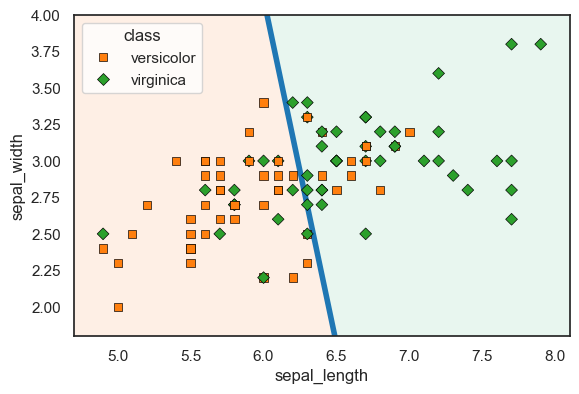

In [13]:
# RUN THIS CELL TO GENERATE A PLOT

# Define a new color map for decision boundaries
newcmp = ListedColormap(np.array([[0.9921568627450981, 0.803921568627451, 0.6745098039215687],
                                  [0.7019607843137254, 0.8862745098039215, 0.803921568627451]]))

# Create vectors to draw the boundary line
X_plot = np.linspace(Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2, 100)
y_sep_line = -(lda.coef_[0,0]/lda.coef_[0,1])*X_plot - (lda.intercept_/lda.coef_[0,1])

# Initialize the plot
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2])
ax.set_ylim([Xy_subset_12['sepal_width'].min() - 0.2, Xy_subset_12['sepal_width'].max() + 0.2])

# Color in the decision boundary areas
DecisionBoundaryDisplay.from_estimator(
    lda,
    X_subset_12,
    cmap=newcmp,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
    eps=0.3,
)

# Shuffle the observations. This causes the overlay order of points on the scatterplot to be random
Xy_subset_12_rndord = Xy_subset_12.copy().reset_index(drop=True)
Xy_subset_12_rndord = shuffle(Xy_subset_12_rndord, random_state=2024).reset_index(drop=True)

# Add scatterplot
sns.scatterplot(
    data=Xy_subset_12_rndord,
    x=Xy_subset_12_rndord.loc[:, "sepal_length"],
    y=Xy_subset_12_rndord.loc[:, "sepal_width"],
    style="class",
    hue="class",
    hue_order=["", "versicolor", "virginica"],
    markers={"versicolor": "s", "virginica": "D"},
    ax=ax,
    zorder=3,
    edgecolor="black"
)

# Add boundary line
sns.regplot(x=X_plot, y=y_sep_line, scatter=False, ax=ax, line_kws={'linewidth':4}, scatter_kws={"zorder":1})

Trong biểu đồ phân tán hiển thị trên, có một đường màu xanh đại diện cho ranh giới quyết định được xác định bởi LDA. Nếu chúng ta sử dụng LDA như một bộ phân loại, chúng ta sẽ gán tất cả các điểm dữ liệu nằm bên trái ranh giới này vào lớp versicolor, trong khi tất cả những điểm bên phải sẽ được gán vào lớp virginica.

Để hiểu cách ranh giới quyết định này được thiết lập, bạn có thể hình dung nó như một đường vuông góc với trục mà dữ liệu được chiếu lên bởi LDA. Đoạn mã dưới đây sẽ chồng thêm một trục như vậy lên biểu đồ trước:


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

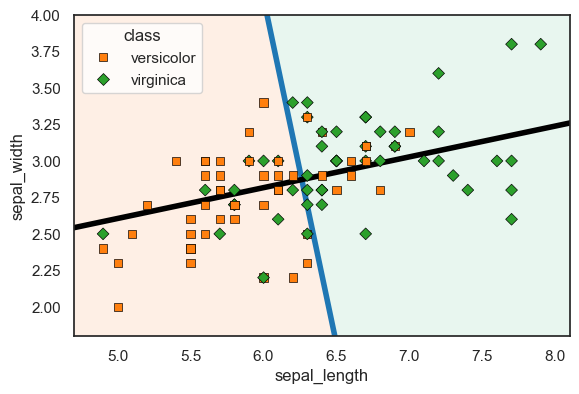

In [14]:
# RUN THIS CELL TO GENERATE A PLOT

# Create vectors to draw the boundary line and new axis
X_plot = np.linspace(Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2, 100)
y_sep_line = -(lda.coef_[0,0]/lda.coef_[0,1])*X_plot - (lda.intercept_/lda.coef_[0,1])
y_new_axis = (lda.coef_[0,1]/lda.coef_[0,0])*(X_plot - Xy_subset_12["sepal_length"].mean()) + Xy_subset_12["sepal_width"].mean()

# Initialize the plot
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2])
ax.set_ylim([Xy_subset_12['sepal_width'].min() - 0.2, Xy_subset_12['sepal_width'].max() + 0.2])

# Color in the decision boundary areas
DecisionBoundaryDisplay.from_estimator(
    lda,
    X_subset_12,
    cmap=newcmp,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
    eps=0.3,
)

# Shuffle the observations. This causes the overlay order of points on the scatterplot to be random
Xy_subset_12_rndord = Xy_subset_12.copy().reset_index(drop=True)
Xy_subset_12_rndord = shuffle(Xy_subset_12_rndord, random_state=2024).reset_index(drop=True)

# Add scatterplot
sns.scatterplot(
    data=Xy_subset_12_rndord,
    x=Xy_subset_12_rndord.loc[:, "sepal_length"],
    y=Xy_subset_12_rndord.loc[:, "sepal_width"],
    style="class",
    hue="class",
    hue_order=["", "versicolor", "virginica"],
    markers={"versicolor": "s", "virginica": "D"},
    ax=ax,
    zorder=3,
    edgecolor="black"
)

# Add boundary line
sns.regplot(x=X_plot, y=y_sep_line, scatter=False, ax=ax, line_kws={'linewidth':4}, scatter_kws={"zorder":1})
# Add new axis
sns.regplot(x=X_plot, y=y_new_axis, scatter=False, ax=ax, line_kws={'linewidth':4}, color="black", scatter_kws={"zorder":2})

Bạn có thể thấy trục mới được chỉ ra dưới dạng một đường màu đen vuông góc với đường ranh giới. Hãy bây giờ chiếu dữ liệu lên trục mới này:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

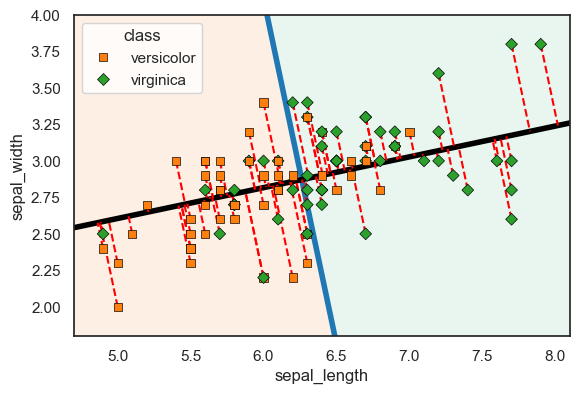

In [15]:
# RUN THIS CELL TO GENERATE A PLOT

# Create vectors to draw the boundary line and new axis
X_plot = np.linspace(Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2, 100)
y_sep_line = -(lda.coef_[0,0]/lda.coef_[0,1])*X_plot - (lda.intercept_/lda.coef_[0,1])
y_new_axis = (lda.coef_[0,1]/lda.coef_[0,0])*(X_plot - Xy_subset_12["sepal_length"].mean()) + Xy_subset_12["sepal_width"].mean()

# Initialize the plot
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2])
ax.set_ylim([Xy_subset_12['sepal_width'].min() - 0.2, Xy_subset_12['sepal_width'].max() + 0.2])

# Color in the decision boundary areas
DecisionBoundaryDisplay.from_estimator(
    lda,
    X_subset_12,
    cmap=newcmp,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
    eps=0.3,
    zorder=0,
    
)

# Draw dashed red projection lines from observations to new axis
for i in range(Xy_subset_12.shape[0]):
    x1 = X_plot[0]
    y1 = y_new_axis[0]
    x2 = X_plot[-1]
    y2 = y_new_axis[-1]
    xp = Xy_subset_12.iloc[i, 0]
    yp = Xy_subset_12.iloc[i, 1]
    t = ((xp - x1)*(x2 - x1) + (yp - y1)*(y2 - y1)) / ((x2 - x1)**2 + (y2 - y1)**2)
    xx = x1 + t*(x2 - x1)
    yy = y1 + t*(y2 - y1)
    ax.plot([xp,xx], [yp,yy], 'r--', zorder=3)

# Shuffle the observations. This causes the overlay order of points on the scatterplot to be random
Xy_subset_12_rndord = Xy_subset_12.copy().reset_index(drop=True)
Xy_subset_12_rndord = shuffle(Xy_subset_12_rndord, random_state=2024).reset_index(drop=True)

# Add scatterplot
sns.scatterplot(
    data=Xy_subset_12_rndord,
    x=Xy_subset_12_rndord.loc[:, "sepal_length"],
    y=Xy_subset_12_rndord.loc[:, "sepal_width"],
    style="class",
    hue="class",
    hue_order=["", "versicolor", "virginica"],
    markers={"versicolor": "s", "virginica": "D"},
    ax=ax,
    zorder=4,
    edgecolor="black"
)

# Add boundary line
sns.regplot(x=X_plot, y=y_sep_line, scatter=False, ax=ax, line_kws={'linewidth':4}, scatter_kws={"zorder":1})
# Add new axis
sns.regplot(x=X_plot, y=y_new_axis, scatter=False, ax=ax, line_kws={'linewidth':4}, color="black", scatter_kws={"zorder":2})

Các đường đỏ đứt nét chỉ ra phương pháp mà dữ liệu sẽ được chiếu lên trục mới. Kết quả của phép chiếu này được cung cấp bởi biểu đồ dưới đây:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

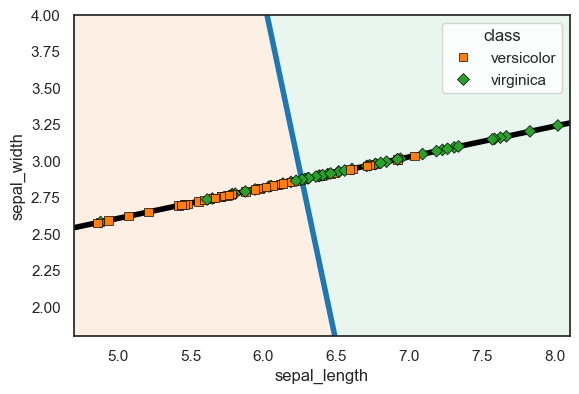

In [16]:
# RUN THIS CELL TO GENERATE A PLOT

# Create vectors to draw the boundary line and new axis
X_plot = np.linspace(Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2, 100)
y_sep_line = -(lda.coef_[0,0]/lda.coef_[0,1])*X_plot - (lda.intercept_/lda.coef_[0,1])
y_new_axis = (lda.coef_[0,1]/lda.coef_[0,0])*(X_plot - Xy_subset_12["sepal_length"].mean()) + Xy_subset_12["sepal_width"].mean()

# Initialize the plot
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([Xy_subset_12['sepal_length'].min() - 0.2, Xy_subset_12['sepal_length'].max() + 0.2])
ax.set_ylim([Xy_subset_12['sepal_width'].min() - 0.2, Xy_subset_12['sepal_width'].max() + 0.2])

# Color in the decision boundary areas
DecisionBoundaryDisplay.from_estimator(
    lda,
    X_subset_12,
    cmap=newcmp,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
    eps=0.3,
    zorder=0
)

# Find projected observation locations on new axis
xs = []
ys = []
for i in range(Xy_subset_12.shape[0]):
    x1 = X_plot[0]
    y1 = y_new_axis[0]
    x2 = X_plot[-1]
    y2 = y_new_axis[-1]
    xp = Xy_subset_12.iloc[i, 0]
    yp = Xy_subset_12.iloc[i, 1]
    t = ((xp - x1)*(x2 - x1) + (yp - y1)*(y2 - y1)) / ((x2 - x1)**2 + (y2 - y1)**2)
    xx = x1 + t*(x2 - x1)
    yy = y1 + t*(y2 - y1)
    xs.append(xx)
    ys.append(yy)

# Shuffle the observations. This causes the overlay order of points on the scatterplot to be random
Xy_subset_12_rndord = pd.concat([Xy_subset_12.reset_index(drop=True), pd.Series(xs), pd.Series(ys)], axis=1)
Xy_subset_12_rndord = shuffle(Xy_subset_12_rndord, random_state=2024).reset_index(drop=True)

# Add scatterplot
sns.scatterplot(
    data=Xy_subset_12_rndord,
    x=Xy_subset_12_rndord.loc[:,0],
    y=Xy_subset_12_rndord.loc[:,1],
    style="class",
    hue="class",
    hue_order=["", "versicolor", "virginica"],
    markers={"versicolor": "s", "virginica": "D"},
    ax=ax,
    zorder=4,
    edgecolor="black"
)

# Add boundary line
sns.regplot(x=X_plot, y=y_sep_line, scatter=False, ax=ax, line_kws={'linewidth':4}, scatter_kws={"zorder":1})
# Add new axis
sns.regplot(x=X_plot, y=y_new_axis, scatter=False, ax=ax, line_kws={'linewidth':4}, color="black", scatter_kws={"zorder":2})

Bây giờ bạn có thể thấy dữ liệu được chiếu lên trục mới. Hãy tiếp tục căn chỉnh, xoay và thay đổi tỷ lệ cho trục mới này:

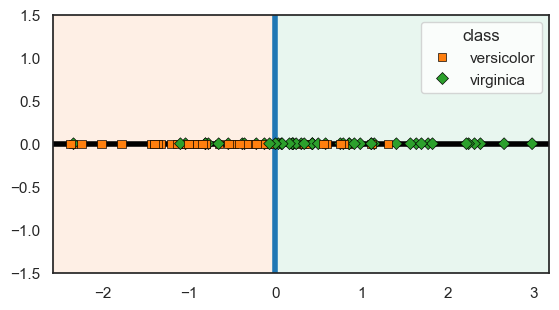

In [17]:
# RUN THIS CELL TO GENERATE A PLOT

# Create vectors to draw the boundary line and new axis
# Note the usage of `lda.transform()` here
Xy_subset_12_rndord = Xy_subset_12.copy().reset_index(drop=True)
Xy_subset_12_rndord = shuffle(Xy_subset_12_rndord, random_state=2024).reset_index(drop=True)
X_train_mod_trans = lda.transform(Xy_subset_12_rndord.iloc[:,:2])

# Initialize the plot
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim([X_train_mod_trans.min() - 0.2, X_train_mod_trans.max() + 0.2])
ax.set_ylim([-1.5, 1.5])

# Add scatterplot
sns.scatterplot(
    x=X_train_mod_trans.flatten(),
    y=np.zeros(len(X_train_mod_trans.flatten())),
    style=Xy_subset_12_rndord.iloc[:,-1],
    hue=Xy_subset_12_rndord.iloc[:,-1],
    hue_order=["", "versicolor", "virginica"],
    markers={"versicolor": "s", "virginica": "D"},
    ax=ax,
    zorder=4,
    edgecolor="black"
)

# Add boundary line as a vertical line through x==0
plt.axvline(0,-4,4, lw=4)

# Add new axis line as a horizontal linr through y==0
sns.regplot(x=[X_train_mod_trans.min() - 0.2, X_train_mod_trans.max() + 0.2], y=[0,0], scatter=False, ax=ax, line_kws={'linewidth':4}, color="black", scatter_kws={"zorder":2})

# Color in the left decision boundary in light orange
ax.axvspan(X_train_mod_trans.min() - 0.2, 0, color='#FDCDAC', alpha=0.3, zorder=0)

# Color in the right decision boundary in light green
ax.axvspan(0, X_train_mod_trans.max() + 0.2, color='#B3E2CD', alpha=0.3, zorder=0)

Những gì bạn đang xem trong biểu đồ trên là biểu đồ một chiều của thành phần LDA đầu tiên. Do đó, một thành phần LDA thực chất chỉ là một phép chiếu dữ liệu đã được căn chỉnh, xoay và thay đổi tỷ lệ lên một trục mới. Các thành phần LDA có thể được sử dụng theo hai cách khác nhau:
- như một bộ phân loại, phân loại dữ liệu vào các lớp khác nhau
- như đầu vào cho một mô hình khác, trong đó thành phần LDA thay thế các đặc trưng ban đầu

## Sử dụng LDA như một bộ phân loại
Trường hợp sử dụng đơn giản nhất là khi bạn sử dụng LDA như một bộ phân loại. Trong trường hợp này, bạn có thể chỉ cần gán lớp `versicolor` cho các điểm bên trái số không và lớp `virginica` cho các điểm bên phải số không.

## Sử dụng các thành phần LDA thay thế các đặc trưng ban đầu
Lựa chọn thứ hai là thay thế các đặc trưng ban đầu bằng các thành phần LDA. Trong kịch bản đã mô tả ở trên, điều này có nghĩa là thay thế các đặc trưng `sepal_length` và `sepal_width` bằng thành phần LDA đầu tiên, giảm số lượng đặc trưng từ hai xuống còn một.

LDA sẽ tạo ra bao nhiêu thành phần? Để trả lời câu hỏi này, chúng ta cần hiểu cách LDA xây dựng trục mới mà dữ liệu sẽ được chiếu lên.

Trong một bài toán với hai lớp như bài toán đã mô tả, LDA chọn một trục tối đa hóa tỷ lệ:

$$
\frac{(\bar{x}_{1} - \bar{x}_{2})^2}{s_{1}^2 + s_{2}^2}
$$

Ở đây, $(\bar{x}_{1}, \bar{x}_{2})$ đại diện cho các giá trị trung bình và $(s_{1}^2, s_{2}^2)$ đại diện cho phương sai của các lớp `versicolor` và `virginica`, tương ứng. Phương sai là một chỉ số đo sự phân tán, trong đó phương sai thấp cho thấy các quan sát được đóng gói chặt chẽ trên trục mới, còn phương sai cao cho thấy các quan sát phân tán rộng.

Do đó, LDA nhằm tối đa hóa một chỉ số dựa trên khoảng cách giữa các giá trị trung bình của lớp (tử lớn hơn) và sự phân tán trong mỗi lớp (mẫu số nhỏ hơn). Về cơ bản, nó tìm cách tối đa hóa khoảng cách giữa các giá trị trung bình của các lớp trong khi giảm thiểu sự phân tán trong mỗi lớp.

Đối với các bài toán có nhiều hơn hai lớp, LDA tính toán một điểm trung bình toàn cục cho tất cả dữ liệu, ký hiệu là $\bar{x}_{all}$. Trong bài toán có $N$ lớp, LDA tối đa hóa:

$$
\frac{\sum_{i=1}^N d_i^2}{\sum_{i=1}^N s_i^2}
$$

trong đó $d_i^2 = (\bar{x}_{i} - \bar{x}_{all})^2$, đại diện cho khoảng cách bình phương giữa trung bình của lớp $i$ và trung bình toàn cục.

Ví dụ, trong một bài toán ba lớp, LDA xác định 2 trục tối đa hóa:

$$
\frac{d_1^2 + d_2^2 + d_3^2}{s_{1}^2 + s_{2}^2 + s_{3}^2}
$$

Nhu cầu có hai trục trong bài toán ba lớp xuất phát từ việc dữ liệu được chiếu lên một mặt phẳng thay vì một trục đơn, và một mặt phẳng có thể được xác định hoàn toàn bởi hai trục.

Do đó, về cơ bản, đối với các bài toán mà số lượng đặc trưng bằng hoặc lớn hơn số lượng lớp, LDA sẽ giảm chiều dữ liệu xuống còn số lớp trừ đi một. Ví dụ, LDA sẽ giảm một bài toán với 18 đặc trưng và 5 lớp xuống còn 4 đặc trưng và 5 lớp. Vì vậy, việc giảm chiều dữ liệu phụ thuộc vào số lượng lớp, không phải số lượng đặc trưng, miễn là số lượng đặc trưng ít nhất bằng số lớp.


<hr style="border:2px solid gray">


# Tiền xử lý thêm: chia bộ dữ liệu

Để đánh giá hiệu suất của bất kỳ mô hình dự đoán nào, bao gồm cả mô hình LDA, chúng ta phải chia bộ dữ liệu thành hai bộ riêng biệt: bộ huấn luyện và bộ kiểm tra. Đối với một bài toán phân loại, bộ huấn luyện huấn luyện mô hình để phân biệt giữa các lớp khác nhau dựa trên các đặc trưng được cung cấp. Mô hình học từ các mẫu và mối quan hệ có trong bộ huấn luyện này. Mặt khác, bộ kiểm tra được sử dụng để đánh giá hiệu suất của mô hình và xem xét mức độ mô hình có thể tổng quát hóa việc học của mình với dữ liệu mới, chưa thấy. Bước này rất quan trọng để đảm bảo rằng mô hình dự đoán có thể dự đoán chính xác dữ liệu thực tế mới.


In [18]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

<hr style="border:2px solid gray">


# Tạo mô hình cơ bản với rừng ngẫu nhiên

Trong bước này, chúng ta sẽ huấn luyện một mô hình cơ bản mà chúng ta sẽ sử dụng để đánh giá hiệu suất của các mô hình LDA.

Cho mục đích này, chúng ta sẽ sử dụng một [rừng ngẫu nhiên](https://en.wikipedia.org/wiki/Random_forest). Nếu bạn chưa quen với cách mà rừng ngẫu nhiên hoạt động, đừng lo lắng. Hiện tại, bạn có thể nghĩ mô hình rừng ngẫu nhiên như một hộp đen phân loại dữ liệu phi tuyến tính dựa trên các đặc trưng số.

## Huấn luyện mô hình rừng ngẫu nhiên cơ bản

Để huấn luyện một mô hình rừng ngẫu nhiên cơ bản trên các đặc trưng gốc, hãy chạy ô lệnh dưới đây:

In [19]:
classifier = RandomForestClassifier(max_depth=2, random_state=2024)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Đánh giá mô hình rừng ngẫu nhiên cơ bản

Chúng ta cần đánh giá hiệu suất của mô hình rừng ngẫu nhiên cơ bản bằng một số chỉ số. Để đơn giản, chúng ta sẽ sử dụng [điểm chính xác](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_multiclass_classification), đại diện cho tỷ lệ dự đoán đúng trong tổng số dự đoán được thực hiện. Điểm chính xác là một chỉ số phù hợp để đánh giá các mô hình phân loại khi bộ dữ liệu có sự cân bằng, tức là số lượng quan sát trong mỗi lớp là xấp xỉ nhau.

Chạy mã lệnh dưới đây để tính toán điểm chính xác và in ra [ma trận nhầm lẫn](https://en.wikipedia.org/wiki/Confusion_matrix):


Accuracy: 0.90


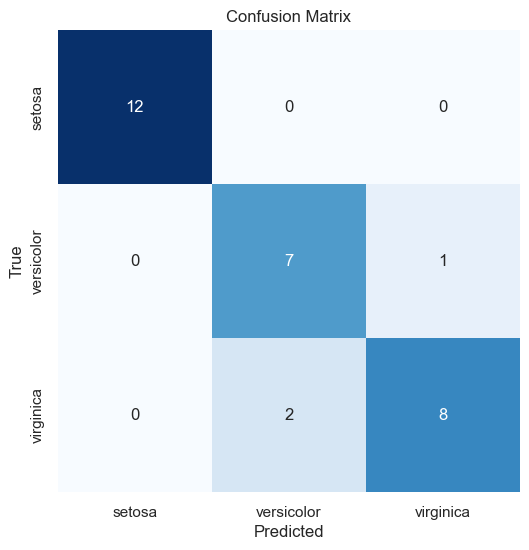

In [20]:
# Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

# Use a pandas DataFrame to get text class labels in the heatmap
conf_m_pd = pd.DataFrame(conf_m)
conf_m_pd.columns = le.inverse_transform(conf_m_pd.columns)
conf_m_pd.index = le.inverse_transform(conf_m_pd.index)

# Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_pd, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Như đã quan sát, bộ phân loại rừng ngẫu nhiên đạt được điểm chính xác 0.9 khi sử dụng các đặc trưng gốc. Ma trận nhầm lẫn cho thấy một hoa versicolor bị phân loại sai thành virginica, và hai hoa virginica bị phân loại sai thành versicolor. Đặc biệt, tất cả các hoa setosa đều được phân loại đúng, điều này phù hợp với các biểu đồ cặp của chúng ta, cho thấy lớp setosa dễ dàng phân tách khỏi các lớp còn lại.

<hr style="border:2px solid gray">


# Sử dụng các thành phần LDA để giảm chiều dữ liệu

Tiếp theo, chúng ta sẽ sử dụng LDA để giảm chiều dữ liệu và sử dụng các thành phần LDA thu được thay vì các đặc trưng gốc cho một bài toán phân loại.

## Thực hiện LDA

Trong bước này, LDA sẽ được áp dụng vào bộ huấn luyện, chuyển đổi không gian đặc trưng bốn chiều thành không gian con hai chiều.

In [21]:
# Apply Linear Discriminant Analysis

# Initialize an instance of `LinearDiscriminantAnalysis`:
lda = LinearDiscriminantAnalysis()

# Fit to the training data and get the LDA components for the training set. Store LDA components in `X_train_lda`
X_train_lda = lda.fit_transform(X_train, y_train)

# Get the LDA components for the test set. Store LDA components in `X_test_lda`
X_test_lda = lda.transform(X_test)

## Trực quan hóa dữ liệu

Tiếp theo, chúng ta sẽ trực quan hóa dữ liệu với chiều giảm, đặc biệt là các thành phần LDA, để đánh giá khả năng phân tách của các lớp. Chúng ta sẽ sử dụng biểu đồ phân tán để hỗ trợ trong việc trực quan hóa các điểm dữ liệu đã được chuyển đổi.

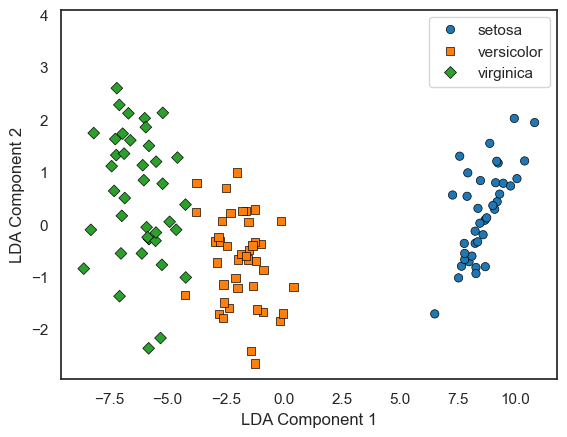

In [22]:
tmp_Df = pd.DataFrame(X_train_lda, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['class'] = le.inverse_transform(y_train)

ax = plt.axes()
ax.set_ylim([tmp_Df['LDA Component 2'].min() - 0.3, tmp_Df['LDA Component 2'].max() + 1.5])


sns.scatterplot(
    data=tmp_Df,
    x='LDA Component 1',
    y='LDA Component 2',
    style='class',
    hue='class',
    hue_order=["setosa", "versicolor", "virginica"],
    markers={"setosa": "o", "versicolor": "s", "virginica": "D"},
    ax=ax,
    edgecolor="black"
)

plt.legend(loc='upper right')

Về mặt trực quan, các lớp có vẻ dễ phân tách hơn trong biểu đồ phân tán trên so với bất kỳ biểu đồ cặp nào được tạo ra từ các đặc trưng gốc.

## Huấn luyện mô hình rừng ngẫu nhiên trên các thành phần LDA làm đặc trưng

Trong bước này, chúng ta sẽ phân loại dữ liệu sử dụng bộ phân loại rừng ngẫu nhiên. Cụ thể, chúng ta sẽ huấn luyện mô hình trên dữ liệu huấn luyện đã được chuyển đổi bởi LDA, cho phép mô hình đưa ra dự đoán dựa trên các đặc trưng LDA giảm chiều, thay vì các đặc trưng gốc. Mặc dù mô hình này giống với mô hình cơ bản (cả hai đều là bộ phân loại rừng ngẫu nhiên với các tham số giống nhau), nhưng các đặc trưng được đưa vào mô hình là khác nhau: mô hình cơ bản sử dụng các đặc trưng gốc, trong khi mô hình được huấn luyện trong phần này sử dụng các thành phần LDA:


In [23]:
classifier = RandomForestClassifier(max_depth=2, random_state=2024)
classifier.fit(X_train_lda, y_train)
y_pred = classifier.predict(X_test_lda)

### Đánh giá mô hình rừng ngẫu nhiên với các thành phần LDA làm đặc trưng

Đoạn mã dưới đây sẽ đánh giá mô hình rừng ngẫu nhiên với hai thành phần LDA làm đặc trưng:


Accuracy: 0.93


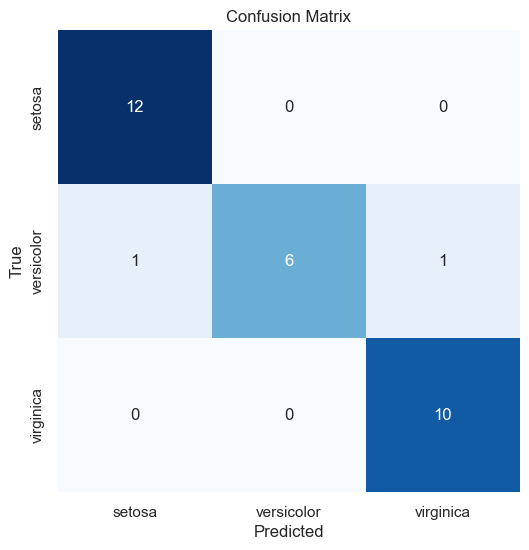

In [24]:
# Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

# Use a pandas DataFrame to get text class labels in the heatmap
conf_m_pd = pd.DataFrame(conf_m)
conf_m_pd.columns = le.inverse_transform(conf_m_pd.columns)
conf_m_pd.index = le.inverse_transform(conf_m_pd.index)

# Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_pd, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Như bạn có thể thấy, mô hình rừng ngẫu nhiên với các thành phần LDA cho kết quả độ chính xác cao hơn (0.93) so với mô hình rừng ngẫu nhiên với các đặc trưng gốc (0.90). Trong trường hợp này, tất cả các hoa setosa và virginica đều được phân loại đúng. Chúng ta cũng chỉ có hai hoa versicolor bị phân loại sai, một hoa bị phân loại thành hoa virginica và một hoa bị phân loại thành hoa setosa. Tổng thể, chỉ có 2 hoa bị phân loại sai so với 3 hoa trong mô hình cơ bản.


<hr style="border:2px solid gray">


# Sử dụng LDA như một bộ phân loại

Trong phần này, chúng ta sẽ không sử dụng mô hình rừng ngẫu nhiên. Thay vào đó, chúng ta sẽ sử dụng LDA để phân loại dữ liệu trực tiếp. Hoàn thành các bài tập sau để phân loại dữ liệu bằng LDA.

---
## Bài tập 1: Khởi tạo một thể hiện của `LinearDiscriminantAnalysis()`

Thay thế phần được gắn nhãn ### REPLACE THIS ### trong ô mã dưới đây để khởi tạo một thể hiện của `LinearDiscriminantAnalysis()`:


In [25]:
# Initialize an instance of `LinearDiscriminantAnalysis`:
lda2 = LinearDiscriminantAnalysis()

---


## Bài tập 2: Gắn đối tượng `LinearDiscriminantAnalysis()` bằng phương thức `fit`:

Thay thế phần được gắn nhãn ### REPLACE THIS ### trong ô mã dưới đây để gắn đối tượng `LinearDiscriminantAnalysis()` mà bạn vừa khởi tạo:


In [26]:
lda2.fit(X_train, y_train)

LinearDiscriminantAnalysis()

---


## Bài tập 3: Sử dụng LDA để phân loại dữ liệu trong bộ kiểm tra:

Thay thế phần được gắn nhãn ### REPLACE THIS ### trong ô mã dưới đây để phân loại dữ liệu trong bộ kiểm tra:


In [27]:
y_pred_lda2 = lda2.predict(X_test)

---


## Bài tập 4: Đánh giá hiệu suất của bộ phân loại LDA:

Thay thế phần được gắn nhãn ### REPLACE THIS ### trong ô mã dưới đây để tính toán điểm chính xác và tạo ma trận nhầm lẫn nhằm đánh giá hiệu suất của bộ phân loại LDA:


Accuracy: 0.97


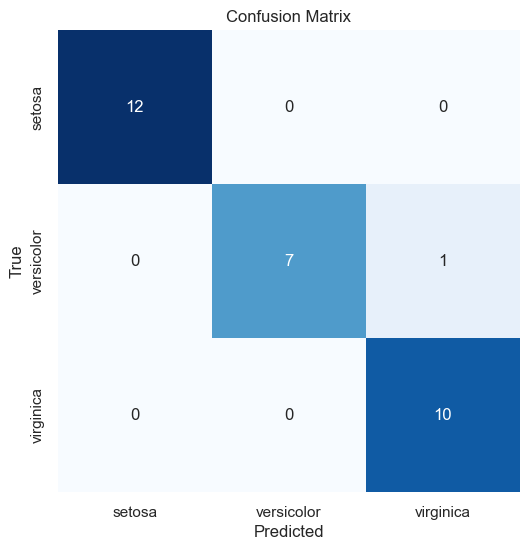

In [28]:
accuracy_lda2 = accuracy_score(y_test, y_pred_lda2)
conf_m_lda2 = confusion_matrix(y_test, y_pred_lda2)

# Use a pandas DataFrame to get text class labels in the heatmap
conf_m_pd = pd.DataFrame(conf_m_lda2)
conf_m_pd.columns = le.inverse_transform(conf_m_pd.columns)
conf_m_pd.index = le.inverse_transform(conf_m_pd.index)

# Display the accuracy
print(f'Accuracy: {accuracy_lda2:.2f}')

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_pd, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

---


Như chúng ta thấy, bộ phân loại LDA hoạt động rất tốt trên bộ dữ liệu này, phân loại chính xác tất cả các hoa ngoại trừ một hoa: một hoa versicolor bị phân loại sai thành hoa virginica.


<hr style="border:2px solid gray">


# Kết luận

Trong dự án thực hành hướng dẫn này, bạn đã hiểu được bản chất của LDA. Hơn nữa, bạn đã học cách thực hiện LDA bằng Python cho các nhiệm vụ khác nhau, bao gồm giảm chiều dữ liệu và phân loại.

Trong bài toán cụ thể mà chúng ta phân tích, liên quan đến việc phân loại hoa iris, bộ phân loại LDA hoạt động tốt hơn cả mô hình rừng ngẫu nhiên với các thành phần LDA và mô hình rừng ngẫu nhiên với các đặc trưng gốc. Kết quả này có thể được giải thích bởi quyết định giới hạn độ sâu của các cây quyết định trong mô hình rừng ngẫu nhiên xuống còn hai, như một ví dụ minh họa. Trong thực tế, mô hình rừng ngẫu nhiên không có các ràng buộc như vậy có khả năng vượt trội hơn bộ phân loại LDA phần lớn thời gian.

Tuy nhiên, điểm quan trọng cần rút ra là đối với các mô hình nhạy cảm với số lượng đặc trưng, chẳng hạn như mô hình rừng ngẫu nhiên giới hạn độ sâu được sử dụng ở đây, các dự đoán tốt hơn có thể đạt được bằng cách giảm số lượng đặc trưng một cách có hệ thống và hợp lý, ví dụ như thông qua LDA. Do đó, trong thực tế, LDA hiếm khi được sử dụng chỉ để phân loại dữ liệu, mà thường được áp dụng như một kỹ thuật giảm chiều dữ liệu để nâng cao hiệu suất của các mô hình phân loại tiếp theo, chẳng hạn như mô hình rừng ngẫu nhiên.


<hr style="border:2px solid gray">


# Phụ lục

Phần này cung cấp thêm thông tin về LDA và cách nó hoạt động ở cấp độ cơ học. Tài liệu trong phụ lục này có tính chất kỹ thuật cao hơn so với giải thích mang tính bản năng đã được cung cấp trong phần chính của hướng dẫn. Tuy nhiên, phần này sẽ cung cấp cho bạn các liên kết để khám phá thêm về kỹ thuật [học máy](https://www.ibm.com/topics/machine-learning?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMSkillsNetwork-GPXX0IAEEN) này nếu bạn muốn tìm hiểu sâu hơn về chủ đề.

Đầu tiên, một vài lời về cách đặt tên: mặc dù phương pháp này thường được gọi là phân tích phân biệt tuyến tính (LDA), nhưng đôi khi cũng sử dụng các thuật ngữ phân tích phân biệt chuẩn (NDA) và phân tích hàm phân biệt (DFA). LDA xây dựng trên phân tích phân biệt tuyến tính của Fisher, một phương pháp thống kê được tiên phong bởi [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). Khác với [Phân tích thành phần chính (PCA)](https://cognitiveclass.ai/courses/practice-using-python-pca-to-reduce-dimenstionality), Phân tích phân biệt tuyến tính (LDA) là một kỹ thuật [học máy có giám sát](https://www.ibm.com/topics/supervised-learning?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMSkillsNetwork-GPXX0IAEEN).

Như đã đề cập trong hướng dẫn, chức năng chính của LDA là chiếu dữ liệu có chiều cao lên một không gian có chiều thấp hơn trong khi vẫn giữ lại tính phân tách của lớp dữ liệu. LDA có thể được áp dụng để nâng cao hiệu quả của các thuật toán phân loại như [cây quyết định](https://www.ibm.com/topics/decision-trees?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMSkillsNetwork-GPXX0IAEEN) hoặc [rừng ngẫu nhiên](https://www.ibm.com/topics/random-forest?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMSkillsNetwork-GPXX0IAEEN).

LDA tuân theo một khuôn khổ mô hình sinh, mô hình này mô tả phân phối dữ liệu cho mỗi lớp và sử dụng định lý Bayes để phân loại các điểm dữ liệu mới. Nó hoạt động dưới hai giả định chính: dữ liệu tuân theo phân phối chuẩn hoặc phân phối Gauss và các ma trận hiệp phương sai của các lớp là như nhau.

Kỹ thuật giảm chiều dữ liệu này tách biệt các điểm dữ liệu bằng cách sử dụng các biến đổi tuyến tính, được phân tích bằng cách sử dụng [vector riêng và giá trị riêng](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors). Khi được vẽ trên mặt phẳng 2 chiều, các vector cung cấp độ lớn và hướng. Các vector riêng đại diện cho hướng, trong khi các giá trị riêng đại diện cho độ lớn hoặc tầm quan trọng. Các vector riêng được tính toán từ bộ dữ liệu và thu thập trong hai ma trận phân tán lớp, đó là ma trận phân tán giữa các lớp và ma trận phân tán trong lớp.

LDA được sử dụng để xác định một tổ hợp tuyến tính của các đặc trưng đặc trưng hoặc phân tách hai hoặc nhiều lớp đối tượng hoặc sự kiện. Tính linh hoạt này đảm bảo rằng LDA có thể được sử dụng cho các bài toán phân loại nhị phân và đa lớp, không giống như [hồi quy logistic](https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/), chỉ giới hạn trong phân loại nhị phân.

<hr style="border:2px solid gray">


# Congratulations! You have completed the lab


## Authors


Eda Kavlakoglu


[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk)


### Other Contributors


[Lucy Xu](https://author.skills.network/instructors/lucy_xu)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-02-21|1.00|wfulmyk|Tutorial written, needs review|
|2023-02-21|1.01|wfulmyk|Fix TOC|


Copyright © 2023 IBM Corporation. All rights reserved.
